**First, get the data from the sqlite file

In [2]:
import sqlite3
import pandas as pd

db_location = "../Data/soccer/database.sqlite"

def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d


def get_table_as_pd_dataframe(table_name):
    query = 'SELECT * FROM ' + table_name + ';'

    con = sqlite3.connect(db_location)
    con.row_factory = dict_factory
    cur = con.cursor()

    cur.execute(query)
    table = cur.fetchall()

    con.close()

    return pd.DataFrame(table)


# ***********  get pandas DataFrames from sqlite file ************
countries = get_table_as_pd_dataframe('Country')
leagues = get_table_as_pd_dataframe('League')
matches = get_table_as_pd_dataframe('Match')
players_data = get_table_as_pd_dataframe('Player')
player_attributes = get_table_as_pd_dataframe('Player_Attributes')
teams_data = get_table_as_pd_dataframe('Team')
team_attributes = get_table_as_pd_dataframe('Team_Attributes')

**Afterwards, merge some tables and clean the data

In [3]:
players = (players_data.merge(player_attributes, how='inner', on=['player_fifa_api_id', 'player_api_id'], suffixes=('', '_pa'), validate='one_to_many')).drop(columns=['id_pa', 'id'])
teams = (teams_data.merge(team_attributes, how='inner', on=['team_fifa_api_id', 'team_api_id'], suffixes=('', '_pa'), validate='one_to_many')).drop(columns=['id_pa', 'id'])

teams['team_fifa_api_id']= pd.to_numeric(teams['team_fifa_api_id'], downcast='integer', errors='coerce')

**Some output

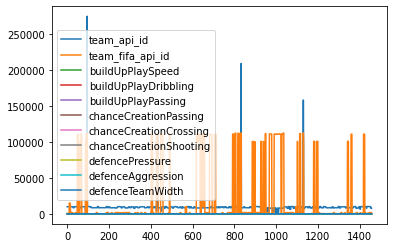

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

teams.plot()